In [408]:
import pandas as pd
import numpy as np
file1 = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')
file1.shape

(10910, 26)

In [409]:
cols = []
for column in file1.columns:
    cols.append(column.lower())
file1.columns = cols
file1.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [410]:
file1.dtypes

unnamed: 0                         int64
customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size    

In [411]:

numericals = list(file1.select_dtypes(include=[np.number]).columns.values)
numericals

# select_dtypes(np.number)

['unnamed: 0',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'months since last claim',
 'months since policy inception',
 'number of open complaints',
 'number of policies',
 'total claim amount']

In [412]:
file1.select_dtypes(['object']).columns

# file1.select_dtypes(object)

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employmentstatus', 'gender', 'location code',
       'marital status', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

In [413]:
file1.isna().sum()

unnamed: 0                          0
customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [414]:
import statistics as stats

stats.mode(file1['state'])

#wip
# file1['state'].unique()
# file1['state'].value_counts()

'California'

In [415]:
file1['state'] = file1['state'].fillna(stats.mode(file1['state']))

In [416]:
file1.isna().sum()

unnamed: 0                          0
customer                            0
state                               0
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [417]:
file1.dtypes

unnamed: 0                         int64
customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size    

In [418]:
file1['vehicle type'].value_counts() #(dropna=False) to ensure we capture the NaN

A    5428
Name: vehicle type, dtype: int64

In [419]:
file1['vehicle class'] = file1['vehicle class'].fillna(stats.mode(file1['vehicle class']))
file1['vehicle size'] = file1['vehicle size'].fillna(stats.mode(file1['vehicle size']))
file1['vehicle type'] = file1['vehicle type'].fillna('unknown')
file1['response'] = file1['response'].fillna(stats.mode(file1['response']))



#wip
#file1['vehicle type'] = file1['vehicle type'].fillna(stats.mode(file1['vehicle type']))
# file1['months since last claim'] = file1['months since last claim'].fillna(np.median(file1['months since last claim']))
# file1['response'] = file1['response'].fillna(np.median(file1['response']))
# file1['number of open complaints'] = file1['number of open complaints'].fillna(np.median(file1['number of open complaints']))



In [420]:
file1['months since last claim'] = file1['months since last claim'].fillna(np.mean(file1['months since last claim']))
file1['number of open complaints'] = file1['number of open complaints'].fillna(np.mean(file1['number of open complaints']))

#Tests
# np.mean(file1['months since last claim'])
# np.median(file1['months since last claim'])

In [421]:
file1.isna().sum()

unnamed: 0                       0
customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
vehicle type                     0
dtype: int64

In [422]:
file1['effective to date'] = pd.to_datetime(file1['effective to date'], errors='coerce')
file1.dtypes
file1.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,unknown
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown


In [423]:

file1['month'] = pd.DatetimeIndex(file1['effective to date']).month

file1

#wip
#file1['effective to date'][0].month

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,unknown,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,unknown,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [424]:
file1[(file1['month'].isin([1,2,3]))]

#wip
#file1[file1['month']==1]
#pd.set_option('display.max_rows', 30)

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,unknown,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,unknown,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [425]:
file1

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,unknown,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,unknown,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [426]:
#wip
# def fillna(col):
#     file1[col] = file1[col].fillna(stats.mode(file1[col]))

# file1.isna().sum()

# fillna('response')

# Round 3

In [427]:
file1.shape

(10910, 27)

In [428]:
file1.dtypes

unnamed: 0                                int64
customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                        

In [429]:
file1.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,unknown,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown,1


In [430]:
file1.tail()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,unknown,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2
10909,10909,IV32877,California,6857.519928,No,Basic,Bachelor,2011-01-08,Unemployed,M,...,3,Personal Auto,Personal L1,Offer4,Web,1021.719397,SUV,Medsize,unknown,1


In [431]:
file1.describe()

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330,1.466728
std,3149.590053,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556,0.498915
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,2727.250000,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5454.500000,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.384256,4.000000,547.200000,2.000000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [432]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

<AxesSubplot:xlabel='response', ylabel='count'>

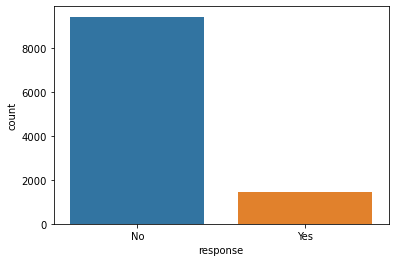

In [433]:
# r_no = file1[(file1['response']=='Yes')].shape[0]
# r_yes = file1[(file1['response']=='No')].shape[0]

# r_total = r_no+r_yes

# sns.barplot(x='customer lifetime value', y= 'response', file1=file1)
# plt.show()


# preferred option
#source https://www.youtube.com/watch?v=wggJ_JSxY0M
sns.countplot(x='response',data=file1)

<AxesSubplot:>

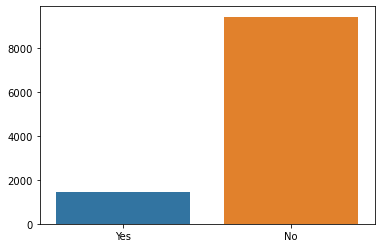

In [434]:
# a bit more code

data = {'response':['Yes', 'No'], 'amount':[file1[(file1['response']=='Yes')].shape[0],file1[(file1['response']=='No')].shape[0]]}


import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='response', y="amount", data=data)

# Create DataFrame
# respMatrix = pd.DataFrame(data)
# respMatrix


In [435]:
file1['sales channel'].unique()

# sns.barplot(x='response', y= 'sales channel', data=file1)
# plt.show()

array(['Agent', 'Call Center', 'Branch', 'Web'], dtype=object)

In [436]:
# agent = file1[(file1['sales channel']=='Agent') & (file1['response']=='Yes')].shape[0]/file1.shape[0]
# agent

# call_center = file1[(file1['sales channel']=='Call Center') & (file1['response']=='Yes')].shape[0]/file1.shape[0]
# call_center

branch = file1[(file1['sales channel']=='Branch') & (file1['response']=='Yes')].shape[0]/file1.shape[0]
branch

0.02988084326306141

In [437]:
# response_rate[]
# i = file1['response']

# for i in len(file1):
#     if i =='Yes':
#     response_rate[].append(1)
#     else:
#         response_rate[].append(0)
# response_rate()        

        
# for i in range(100):
#     if i % 3 == 0 and i % 5 == 0:
#         print('fizzbuzz')
#     elif i % 3 == 0:
#         print('fizz')
#     elif i % 5 == 0:
#         print('buzz')
#     else:
#         print('-')        



# file1['response'].unique()

# for x in file1['response']: 
#     if x == 'Yes': 1
#     else: 0

# file1['response_rate'] = list(map(clean, file1['response']))
# file1['response_rate'].unique()
# file1


In [438]:
# file1['response'].unique()

# def clean(x):
#     if x in ['Yes']:
#         return 1
#     else:
#         return 0

# file1['response'] = list(map(clean, file1['response']))
# file1['response'].unique()
# file1


In [439]:
#file1 = file1.drop(['response_new'], axis =1)
# df = sns.load_dataset('tips')
# x, y, hue = file1['sales channel'], file1['response_rate'], file1['sales channel']
# hue_order = ['Yes', 'No']

# (df[x]
#  .groupby(df[hue])
#  .value_counts(normalize=True)
#  .rename(y)
#  .reset_index()
#  .pipe((sns.barplot, 'data'), x=x, y=y, hue=hue))

#sns.barplot(x=file1['sales channel'], y=file1['response_rate'], data=df, estimator=lambda x: sum(x==0)*100.0/len(x))

#pip install dexplot


# import dexplot as dxp
# dxp.count('sales channel', data=file1, split='response_rate')

<AxesSubplot:xlabel='sales channel', ylabel='count'>

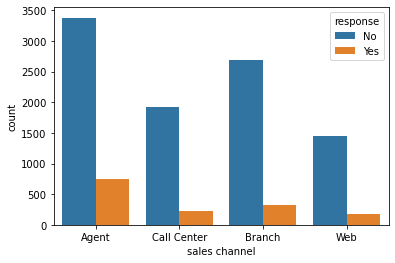

In [440]:
#sns.countplot( x='sales channel', hue='response_rate', data = file1)
sns.countplot( x='sales channel', hue='response', data = file1)

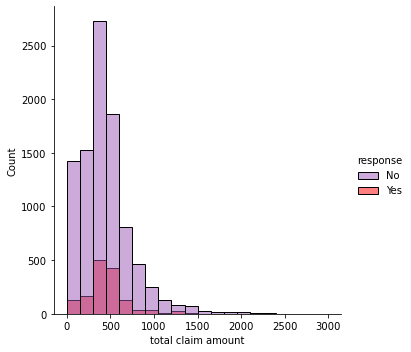

In [441]:
#sns.countplot( x='total claim amount', hue='response_rate', data = file1)
#sns.displot(data=file1, x="total claim amount", hue="response_rate",palette=["#9b59b6", "#ff0000"], binwidth=150)
#https://stackoverflow.com/questions/67443657/how-to-change-color-saturation-of-seaborn-displot
sns.displot(data=file1, x="total claim amount", hue="response",palette=["#9b59b6", "#ff0000"], binwidth=150)

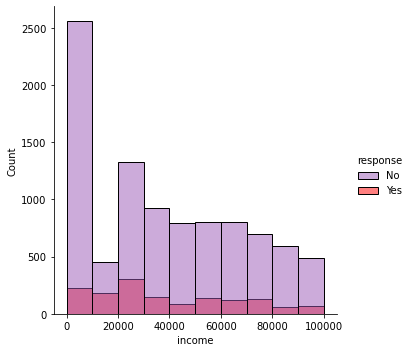

In [442]:
sns.displot(data=file1, x="income", hue="response",palette=["#9b59b6", "#ff0000"], binwidth=10000)

In [443]:
# Seb's findings
# # Show a plot of the response rate by the sales channel.
# amount = [] # calculate the 4 values
# for value in file['Sales Channel'].unique(): # for each unique value (Agent, Call Center, Branch, Web)
# 	# calculate: All rows / rows with yes response
# 	# and append the result to the list
#     amount.append(round(file[file['Sales Channel']==value].shape[0]/file[(file['Sales Channel']==value) & (file['Response']=='Yes')].shape[0],2))
# 	# now amount is filled with the 4 values
# # I need to put a list with the Sales Channels into Response like this
# data = {'Response': (Agent, Call Center, Branch, Web), 'Amount':amount}
# # I get the list via file['Sales Channel'].unique()
# # but it's actually not a list but an array so I have to transform the array to a list, tjerefore i need the "to.list()" command which I have to import from the array bib.
# from array import *
# # and then I put "file['Sales Channel'].unique().tolist()" into response
# data = {'Response': file['Sales Channel'].unique().tolist(), 'Amount':amount}
# # Plot the Chart:
# rr = sns.barplot(x='Response', y="Amount", data=data)
# rr.set(xlabel="Response Rate", ylabel="Sales Channel")

# Round 4

In [444]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lm = linear_model.LinearRegression()

file1 = file1.drop(['unnamed: 0'], axis = 1)

n = file1._get_numeric_data()
c = file1.select_dtypes(['object'])
n.head()
c.head()

,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,unknown
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,unknown
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,unknown


In [445]:
n.columns


Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'total claim amount',
       'month'],
      dtype='object')

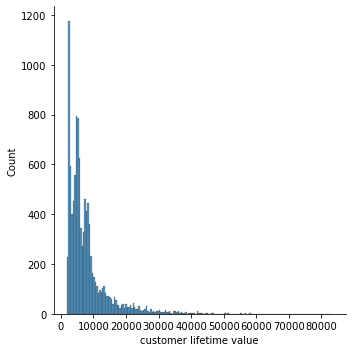

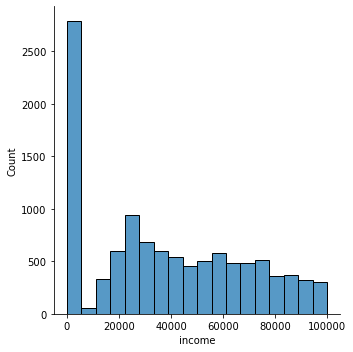

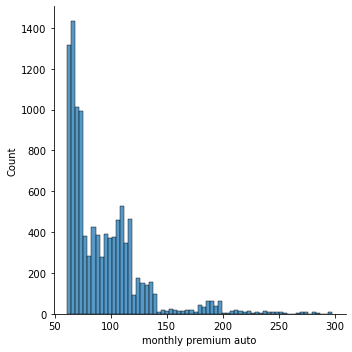

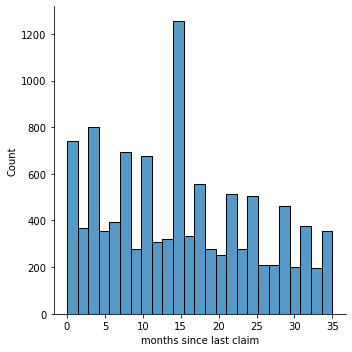

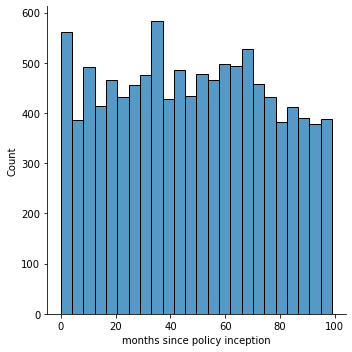

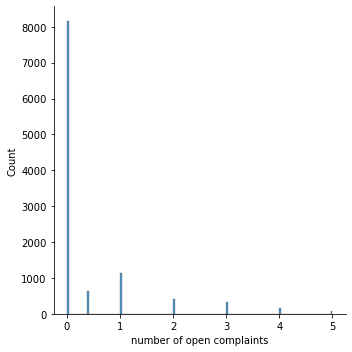

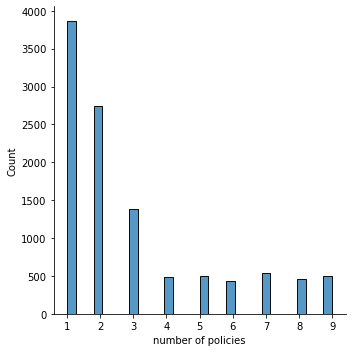

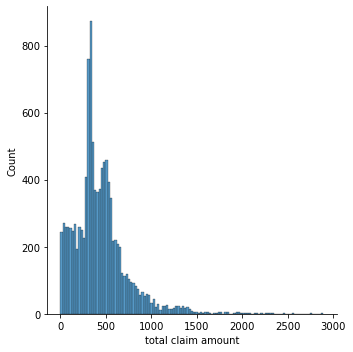

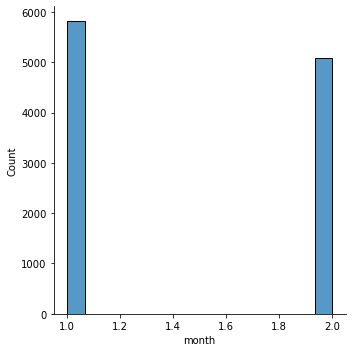

In [446]:
for column in n:
    sns.displot(n[column])


In [447]:
# %%time
# sns.pairplot(n)
# plt.show()


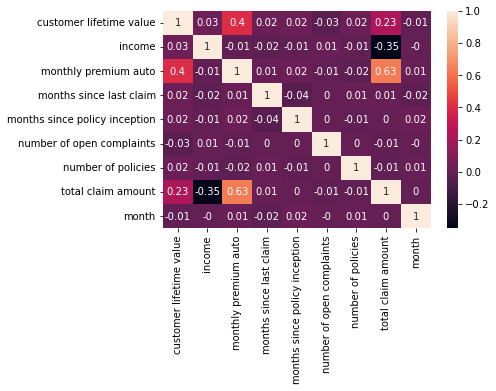

In [448]:
correlations_matrix = round(n.corr(),2)
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [449]:
y = n['total claim amount']
X = n[['customer lifetime value']]

lm.fit(X,y)
print(lm.intercept_)
print(lm.coef_)

355.733102542628
[0.00987189]


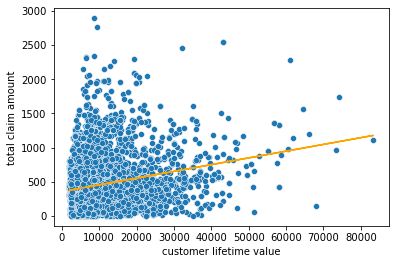

In [450]:
# playing around


regression_line = lm.intercept_ + lm.coef_[0]*n['customer lifetime value']
plt.plot(n['customer lifetime value'],regression_line, c = 'orange')
sns.scatterplot(x='customer lifetime value', y='total claim amount', data=n)
plt.show()

In [451]:
# playing around

y = n['total claim amount']
X2 = n[['monthly premium auto']]

lm.fit(X2,y)
print(lm.intercept_)
print(lm.coef_)

-64.6081404805638
[5.35963084]


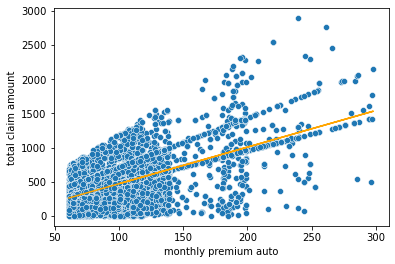

Wall time: 256 ms


In [452]:
%%time
regression_line = lm.intercept_ + lm.coef_[0]*n['monthly premium auto']
plt.plot(n['monthly premium auto'],regression_line, c = 'orange')
sns.scatterplot(x='monthly premium auto', y='total claim amount', data=n)
plt.show()

# Round 5

In [453]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

# X-y split
# n are numbers
# c are objects

In [454]:
# Normalize (numerical). 
transformer = MinMaxScaler().fit(n)
x_normalized = transformer.transform(n)
print(x_normalized.shape)
x_normalized
norm = pd.DataFrame(x_normalized, columns=n.columns)
norm

(10910, 9)


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.000000,1.000,0.101171,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.000000,0.000,0.257445,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.000000,0.125,0.165875,1.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.000000,0.125,0.167263,0.0
4,0.087527,0.236795,0.236287,0.432831,0.313131,0.076851,0.750,0.244657,0.0
...,...,...,...,...,...,...,...,...,...
10905,0.167823,0.000000,0.810127,0.432831,0.404040,0.076851,0.750,0.419717,0.0
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.000000,0.625,0.094333,0.0
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.000000,0.125,0.131763,1.0
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.800000,0.625,0.213674,1.0


In [455]:
norm.corr()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
customer lifetime value,1.000000,0.028306,0.403069,0.015683,0.016960,-0.031501,0.016024,0.232626,-0.009234
income,0.028306,1.000000,-0.009788,-0.023126,-0.005903,0.006956,-0.009960,-0.354141,-0.000443
monthly premium auto,0.403069,-0.009788,1.000000,0.008504,0.018953,-0.010066,-0.020505,0.631799,0.007253
months since last claim,0.015683,-0.023126,0.008504,1.000000,-0.038155,0.002246,0.007425,0.012728,-0.019359
months since policy inception,0.016960,-0.005903,0.018953,-0.038155,1.000000,0.004247,-0.009123,0.003095,0.015163
number of open complaints,-0.031501,0.006956,-0.010066,0.002246,0.004247,1.000000,0.003964,-0.011025,-0.004671
number of policies,0.016024,-0.009960,-0.020505,0.007425,-0.009123,0.003964,1.000000,-0.008923,0.005127
total claim amount,0.232626,-0.354141,0.631799,0.012728,0.003095,-0.011025,-0.008923,1.000000,0.001425
month,-0.009234,-0.000443,0.007253,-0.019359,0.015163,-0.004671,0.005127,0.001425,1.000000


In [456]:
norm.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,10910.0,0.075162,0.084555,0.0,0.025992,0.047566,0.087130,1.0
income,10910.0,0.375434,0.303650,0.0,0.000000,0.338199,0.622626,1.0
monthly premium auto,10910.0,0.135848,0.145327,0.0,0.029536,0.092827,0.202532,1.0
months since last claim,10910.0,0.432831,0.279529,0.0,0.200000,0.428571,0.657143,1.0
months since policy inception,10910.0,0.485777,0.282229,0.0,0.242424,0.484848,0.717172,1.0
number of open complaints,10910.0,0.076851,0.177118,0.0,0.000000,0.000000,0.076851,1.0
number of policies,10910.0,0.247399,0.299920,0.0,0.000000,0.125000,0.375000,1.0
total claim amount,10910.0,0.150283,0.100991,0.0,0.093664,0.132197,0.189103,1.0
month,10910.0,0.466728,0.498915,0.0,0.000000,0.000000,1.000000,1.0


In [457]:
c.describe().T

,count,unique,top,freq
customer,10910,9134,ID89933,7
state,10910,5,California,4183
response,10910,2,No,9444
coverage,10910,3,Basic,6660
education,10910,5,Bachelor,3272
employmentstatus,10910,5,Employed,6789
gender,10910,2,F,5573
location code,10910,3,Suburban,6902
marital status,10910,3,Married,6319
policy type,10910,3,Personal Auto,8128


# Round 6

In [458]:
# dropping customer, vehicle type, eduction, marital status, policy, employmentstatus, renew offer type, response
c = c.drop(['customer','vehicle type', 'education', 'marital status','policy','employmentstatus','renew offer type', 'response'], axis=1)

In [459]:
c['vehicle class'].value_counts()

Four-Door Car    5834
Two-Door Car     2118
SUV              2012
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: vehicle class, dtype: int64

In [460]:
# OneHot for state, gender, location code, policy type, ale channel
# OrdinalEncoder for coverage, vehicle size
# creating 2 df for each approach
c

,state,coverage,gender,location code,policy type,sales channel,vehicle class,vehicle size
0,Arizona,Basic,M,Suburban,Corporate Auto,Agent,Four-Door Car,Medsize
1,California,Basic,F,Suburban,Personal Auto,Call Center,Four-Door Car,Medsize
2,Washington,Basic,M,Suburban,Personal Auto,Call Center,SUV,Medsize
3,Oregon,Extended,M,Suburban,Corporate Auto,Branch,Four-Door Car,Medsize
4,Oregon,Premium,F,Suburban,Personal Auto,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...
10905,Nevada,Premium,F,Suburban,Personal Auto,Web,Luxury Car,Medsize
10906,Oregon,Basic,F,Urban,Personal Auto,Branch,Four-Door Car,Medsize
10907,Arizona,Extended,F,Rural,Corporate Auto,Web,Luxury SUV,Medsize
10908,California,Premium,F,Urban,Personal Auto,Branch,SUV,Medsize


In [461]:
c_hot = c.drop(['coverage', 'vehicle size'], axis = 1)
c_ord = c[['coverage', 'vehicle size']]

In [462]:
c_hot

,state,gender,location code,policy type,sales channel,vehicle class
0,Arizona,M,Suburban,Corporate Auto,Agent,Four-Door Car
1,California,F,Suburban,Personal Auto,Call Center,Four-Door Car
2,Washington,M,Suburban,Personal Auto,Call Center,SUV
3,Oregon,M,Suburban,Corporate Auto,Branch,Four-Door Car
4,Oregon,F,Suburban,Personal Auto,Branch,Four-Door Car
...,...,...,...,...,...,...
10905,Nevada,F,Suburban,Personal Auto,Web,Luxury Car
10906,Oregon,F,Urban,Personal Auto,Branch,Four-Door Car
10907,Arizona,F,Rural,Corporate Auto,Web,Luxury SUV
10908,California,F,Urban,Personal Auto,Branch,SUV


In [463]:
c_ord

,coverage,vehicle size
0,Basic,Medsize
1,Basic,Medsize
2,Basic,Medsize
3,Extended,Medsize
4,Premium,Medsize
...,...,...
10905,Premium,Medsize
10906,Basic,Medsize
10907,Extended,Medsize
10908,Premium,Medsize


# One Hot/Label Encoding (categorical)

In [464]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [465]:
type(c_hot)

pandas.core.frame.DataFrame

In [466]:



encoder = OneHotEncoder().fit(c_hot)
#print(encoder.categories_)
encoded = encoder.transform(c_hot).toarray()
#print(encoded)
cols = [colname for row in encoder.categories_ for colname in row]
cols
onehot_encoded = pd.DataFrame(np.array(encoded),columns=cols)
onehot_encoded.head(20)
cols_to_drop = [row[0] for row in encoder.categories_]
cols_to_drop
onehot_encoded = onehot_encoded.drop(cols_to_drop, axis = 1)
onehot_encoded

# onehot_encoded = pd.DataFrame(np.array([['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
#                                         ['F', 'M'],
#                                  ['Female','missing','None'], ['Male','Yes','Ventouse']]), 
#                       columns=['gender', 'diabetes', 'assistance'])

,California,Nevada,Oregon,Washington,M,Suburban,Urban,Personal Auto,Special Auto,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
10906,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10908,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [467]:
c_ord.head(20)

,coverage,vehicle size
0,Basic,Medsize
1,Basic,Medsize
2,Basic,Medsize
3,Extended,Medsize
4,Premium,Medsize
5,Basic,Medsize
6,Basic,Medsize
7,Basic,Medsize
8,Premium,Medsize
9,Extended,Small


In [468]:
c_ord['vehicle size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [469]:
# ord_encoded = OrdinalEncoder().fit(c_ord).transform(c_ord) # ordered wrt value counts
# ord_encoded = pd.DataFrame(ord_encoded,columns=c_ord.columns)
# display(ord_encoded.head(20))
#ord_encoded['gender'].value_counts()

ord_encoded = OrdinalEncoder(categories = [['Basic', 'Extended', 'Premium'], ['Medsize', 'Small', 'Large']]).fit(c_ord)
# ord_encoded
ord_encoded = pd.DataFrame((ord_encoded.transform(c_ord)), columns = c_ord.columns)
ord_encoded.head(20)


# label_encoded = c_ord.apply(LabelEncoder().fit_transform)
# #label_encoded.head(20)
# label_encoded.head(20).value_counts()

# >>> enc = OrdinalEncoder()
# >>> X = [['Male', 1], ['Female', 3], ['Female', 2]]
# >>> enc.fit(X)
# OrdinalEncoder()
# >>> enc.categories_
# [array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]
# >>> enc.transform([['Female', 3], ['Male', 1]])
# array([[0., 2.],
#        [1., 0.]])

,coverage,vehicle size
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,2.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,2.0,0.0
9,1.0,1.0


In [470]:
ord_encoded.shape

(10910, 2)

In [471]:
# dropping total claim amount from numeric dataframe as I mistakenly left it in
norm = norm.drop(['total claim amount'], axis = 1)
norm

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.000000,1.000,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.000000,0.000,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.000000,0.125,1.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.000000,0.125,0.0
4,0.087527,0.236795,0.236287,0.432831,0.313131,0.076851,0.750,0.0
...,...,...,...,...,...,...,...,...
10905,0.167823,0.000000,0.810127,0.432831,0.404040,0.076851,0.750,0.0
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.000000,0.625,0.0
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.000000,0.125,1.0
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.800000,0.625,1.0


# Concat DataFrames

In [472]:
X = pd.concat([ord_encoded, onehot_encoded], axis=1)
X.isna().sum()

coverage         0
vehicle size     0
California       0
Nevada           0
Oregon           0
Washington       0
M                0
Suburban         0
Urban            0
Personal Auto    0
Special Auto     0
Branch           0
Call Center      0
Web              0
Luxury Car       0
Luxury SUV       0
SUV              0
Sports Car       0
Two-Door Car     0
dtype: int64

In [473]:
X.shape

(10910, 19)

In [474]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
coverage,10910.0,0.479835,0.655897,0.0,0.0,0.0,1.0,2.0
vehicle size,10910.0,0.376535,0.656605,0.0,0.0,0.0,1.0,2.0
California,10910.0,0.383410,0.486239,0.0,0.0,0.0,1.0,1.0
Nevada,10910.0,0.091017,0.287647,0.0,0.0,0.0,0.0,1.0
Oregon,10910.0,0.266636,0.442221,0.0,0.0,0.0,1.0,1.0
Washington,10910.0,0.081393,0.273451,0.0,0.0,0.0,0.0,1.0
M,10910.0,0.489184,0.499906,0.0,0.0,0.0,1.0,1.0
Suburban,10910.0,0.632631,0.482110,0.0,0.0,1.0,1.0,1.0
Urban,10910.0,0.173419,0.378626,0.0,0.0,0.0,0.0,1.0
Personal Auto,10910.0,0.745005,0.435879,0.0,0.0,1.0,1.0,1.0


In [475]:
y.head()

0    292.800000
1    744.924331
2    480.000000
3    484.013411
4    707.925645
Name: total claim amount, dtype: float64

# Train-test split

In [476]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [477]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8728, 19)
(2182, 19)
(8728,)
(2182,)


In [478]:
X_train.head()

,coverage,vehicle size,California,Nevada,Oregon,Washington,M,Suburban,Urban,Personal Auto,Special Auto,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
3105,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6032,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
157,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6964,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6349,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [479]:
y_train.head()

3105    297.600000
6032    609.600000
157     604.800000
6964    489.600000
6349    208.598246
Name: total claim amount, dtype: float64

# Apply linear regression

In [480]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [481]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.7034467429585793

In [482]:
predictions = lm.predict(X_test)
r2_score(y_test, predictions)

0.678858940347887

In [483]:
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_test,predictions))

161.02758931635765

In [484]:
predictions

array([427.42569313, 440.27953055, 435.39631609, ..., 439.544522  ,
        -9.08633017,  18.98138573])

# Description:

# MAE

In [485]:
from sklearn.metrics import mean_absolute_error, r2_score
import math
mae = mean_absolute_error(y_test, predictions)
print(mae)

113.17962865737287


# MSE

In [489]:
mse = mean_squared_error(y_test,predictions)
mse

25929.884521037544

# RMSE

In [490]:
rmse = math.sqrt(mse)
print(rmse)

161.02758931635765


# r2

In [491]:
r2 = r2_score(y_test, predictions)
r2

0.678858940347887

In [124]:
# Leaving the outlier for round 8
# # Removing outliers. I have decided to use monthly premium auto as it has the strongest correlation with total claim amount

# y = norm['monthly premium auto']
# X = norm[['total claim amount']]

In [125]:
# X.head()

In [126]:
# sns.displot(X['total claim amount'])
# plt.show()

In [127]:
# # first we will normalise total claim amount
# sns.boxplot(x=X['total claim amount'])
# plt.show()

In [128]:
# iqr = np.percentile(X['total claim amount'],75) - np.percentile(X['total claim amount'],25)
# upper_limit = np.percentile(X['total claim amount'],75) + 1.5 * iqr
# lower_limit = np.percentile(X['total claim amount'],25) - 1.5 * iqr

In [129]:
# upper_limit

In [130]:
# lower_limit

In [131]:
# # no more outliers!!
# data_x = X[(X['total claim amount']>lower_limit) & (X['total claim amount']<upper_limit)]
# sns.displot(data_x)
# plt.show()

In [132]:
# sns.displot(y)
# plt.show()

In [133]:
# sns.boxplot(x=y)
# plt.show()

In [134]:
# iqr = np.percentile(y,75) - np.percentile(y,25)
# upper_limit = np.percentile(y,75) + 1.5 * iqr
# lower_limit = np.percentile(y,25) - 1.5 * iqr

In [135]:
# upper_limit

In [136]:
# lower_limit

In [137]:
# # No more outliers!!
# data_y = y[(y > lower_limit) & (y < upper_limit)]
# sns.displot(data_y)
# plt.show()

In [138]:
# data_x.head()

In [139]:
# data_x.dtypes

In [140]:
# data_y.head()

In [141]:
# data_y.dtypes

In [142]:
# data_y.head